In [61]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [62]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

In [63]:
# Define the function to approximate
def f(x):
    return np.exp(-np.sin(x**2)/2) + x


In [64]:
# Generate data
x_all = np.linspace(-10, 10, 25)
y_all = f(x_all)


In [65]:
# Split into training and test sets
indices = list(range(25))
random.shuffle(indices)
train_indices = indices[:20]
test_indices = indices[20:]

x_train = x_all[train_indices]
y_train = y_all[train_indices]
x_test = x_all[test_indices]
y_test = y_all[test_indices]

In [66]:
# Define activation functions
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


In [67]:
# Choose activation function (tanh is chosen for its smoothness which fits the target function)
activation = tanh
activation_derivative = tanh_derivative

In [68]:
# Initialize parameters
w1 = np.random.randn()
b1 = np.random.randn()
w2 = np.random.randn()
b2 = np.random.randn()
w3 = np.random.randn()
b3 = np.random.randn()

In [69]:
# Hyperparameters
learning_rate = 0.01
epochs = 10000

In [70]:
# Training history
loss_history = []

In [71]:
# Training loop
for epoch in range(epochs):
    # Forward propagation
    z1 = w1 * x_train + b1
    a1 = activation(z1)

    z2 = w2 * a1 + b2
    a2 = activation(z2)

    z3 = w3 * a2 + b3
    y_pred = activation(z3)

    # Compute loss (MSE)
    loss = np.mean((y_pred - y_train)**2)
    loss_history.append(loss)

    # Backward propagation
    m = len(x_train)

    # Layer 3 gradients
    dz3 = 2 * (y_pred - y_train) * activation_derivative(z3) / m
    dw3 = np.sum(dz3 * a2)
    db3 = np.sum(dz3)

    # Layer 2 gradients
    dz2 = dz3 * w3 * activation_derivative(z2)
    dw2 = np.sum(dz2 * a1)
    db2 = np.sum(dz2)

    # Layer 1 gradients
    dz1 = dz2 * w2 * activation_derivative(z1)
    dw1 = np.sum(dz1 * x_train)
    db1 = np.sum(dz1)

    # Update parameters
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    w3 -= learning_rate * dw3
    b3 -= learning_rate * db3

    # Print progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 39.53366714707474
Epoch 1000, Loss: 28.12228913370825
Epoch 2000, Loss: 28.108331448967885
Epoch 3000, Loss: 28.10391341861772
Epoch 4000, Loss: 28.101746684500103
Epoch 5000, Loss: 28.100460028898585
Epoch 6000, Loss: 28.09960781669332
Epoch 7000, Loss: 28.099001813867847
Epoch 8000, Loss: 28.098548799115434
Epoch 9000, Loss: 28.098197335219858


In [72]:
# Final parameters
print("\nFinal parameters:")
print(f"w1: {w1}, b1: {b1}")
print(f"w2: {w2}, b2: {b2}")
print(f"w3: {w3}, b3: {b3}")


Final parameters:
w1: 0.4442178798644236, b1: 0.22069033594407397
w2: 2.384041457998056, b2: 0.2950660960178927
w3: 4.457846363384505, b3: 0.15449497245642702


In [73]:
# Evaluate on training and test sets
def predict(x):
    z1 = w1 * x + b1
    a1 = activation(z1)

    z2 = w2 * a1 + b2
    a2 = activation(z2)

    z3 = w3 * a2 + b3
    return activation(z3)


In [74]:
# Calculate errors
train_predictions = predict(x_train)
test_predictions = predict(x_test)

train_error = np.mean((train_predictions - y_train)**2)
test_error = np.mean((test_predictions - y_test)**2)

print(f"\nTraining Error (MSE): {train_error}")
print(f"Test Error (MSE): {test_error}")


Training Error (MSE): 28.09791671813527
Test Error (MSE): 26.526273317596672


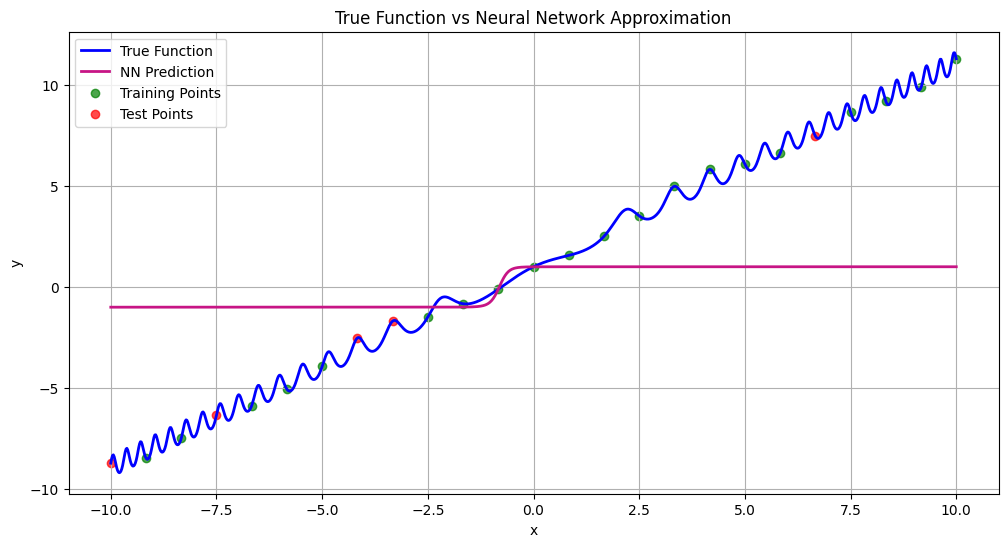

In [78]:
# Plot the true function and predictions
x_plot = np.linspace(-10, 10, 1000)
y_true = f(x_plot)
y_pred_plot = predict(x_plot)

plt.figure(figsize=(12, 6))
plt.plot(x_plot, y_true, label='True Function', linewidth=2, color='blue')
plt.plot(x_plot, y_pred_plot, label='NN Prediction', linewidth=2, color="#C71585")

plt.scatter(x_train, y_train, label='Training Points', color='green', alpha=0.7)
plt.scatter(x_test, y_test, label='Test Points', color='red', alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Neural Network Approximation')
plt.legend()
plt.grid(True)
plt.show()

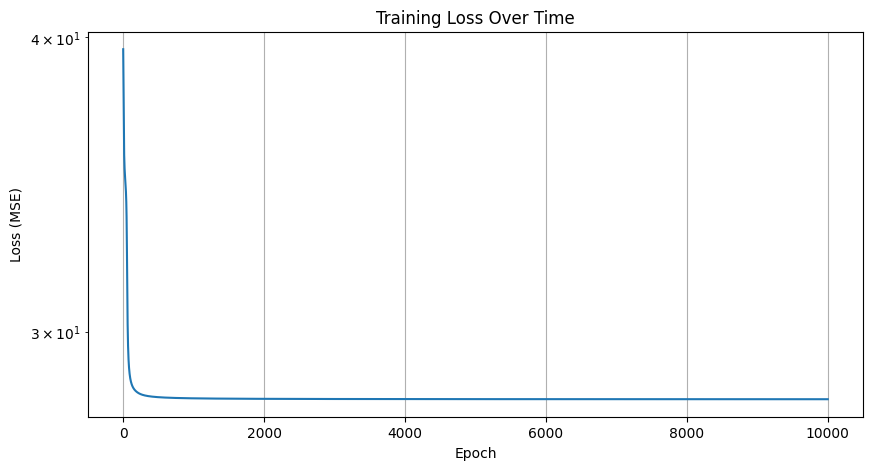

In [79]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Time')
plt.yscale('log')
plt.grid(True)
plt.show()